In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Load influencer dataset
file_path = "Desktop/influencers_log_and_minmax_scaled.csv"
df = pd.read_csv(file_path)
X = df.values  

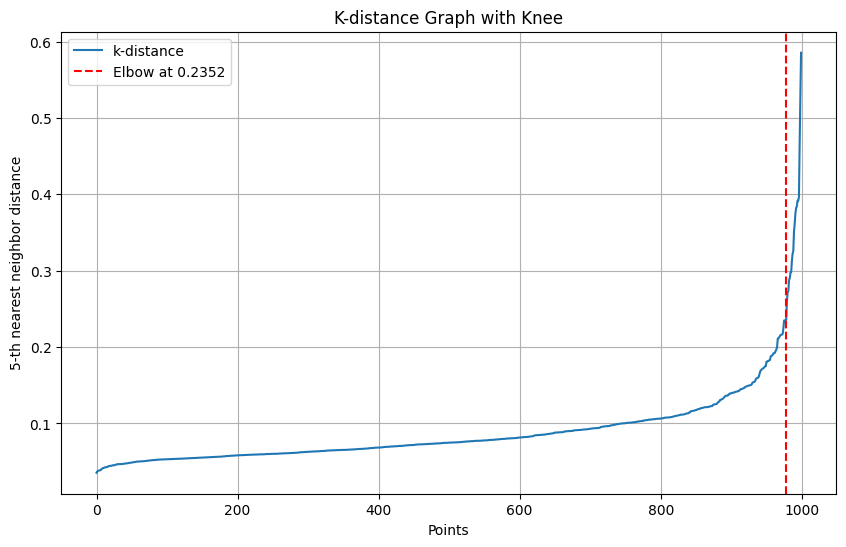

Recommended eps: 0.23521567307622376


In [25]:

from kneed import KneeLocator
def find_eps_with_kneedle(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k - 1])
    kneedle = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
    eps_value = distances[kneedle.knee] if kneedle.knee is not None else None

    plt.figure(figsize=(10, 6))
    plt.plot(distances, label='k-distance')
    if kneedle.knee is not None:
        plt.axvline(kneedle.knee, color='r', linestyle='--', label=f'Elbow at {eps_value:.4f}')
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph with Knee')
    plt.legend()
    plt.grid(True)
    plt.show()
    return eps_value
    
eps = find_eps_with_kneedle(X, k=5)
print(f"Recommended eps: {eps}")

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

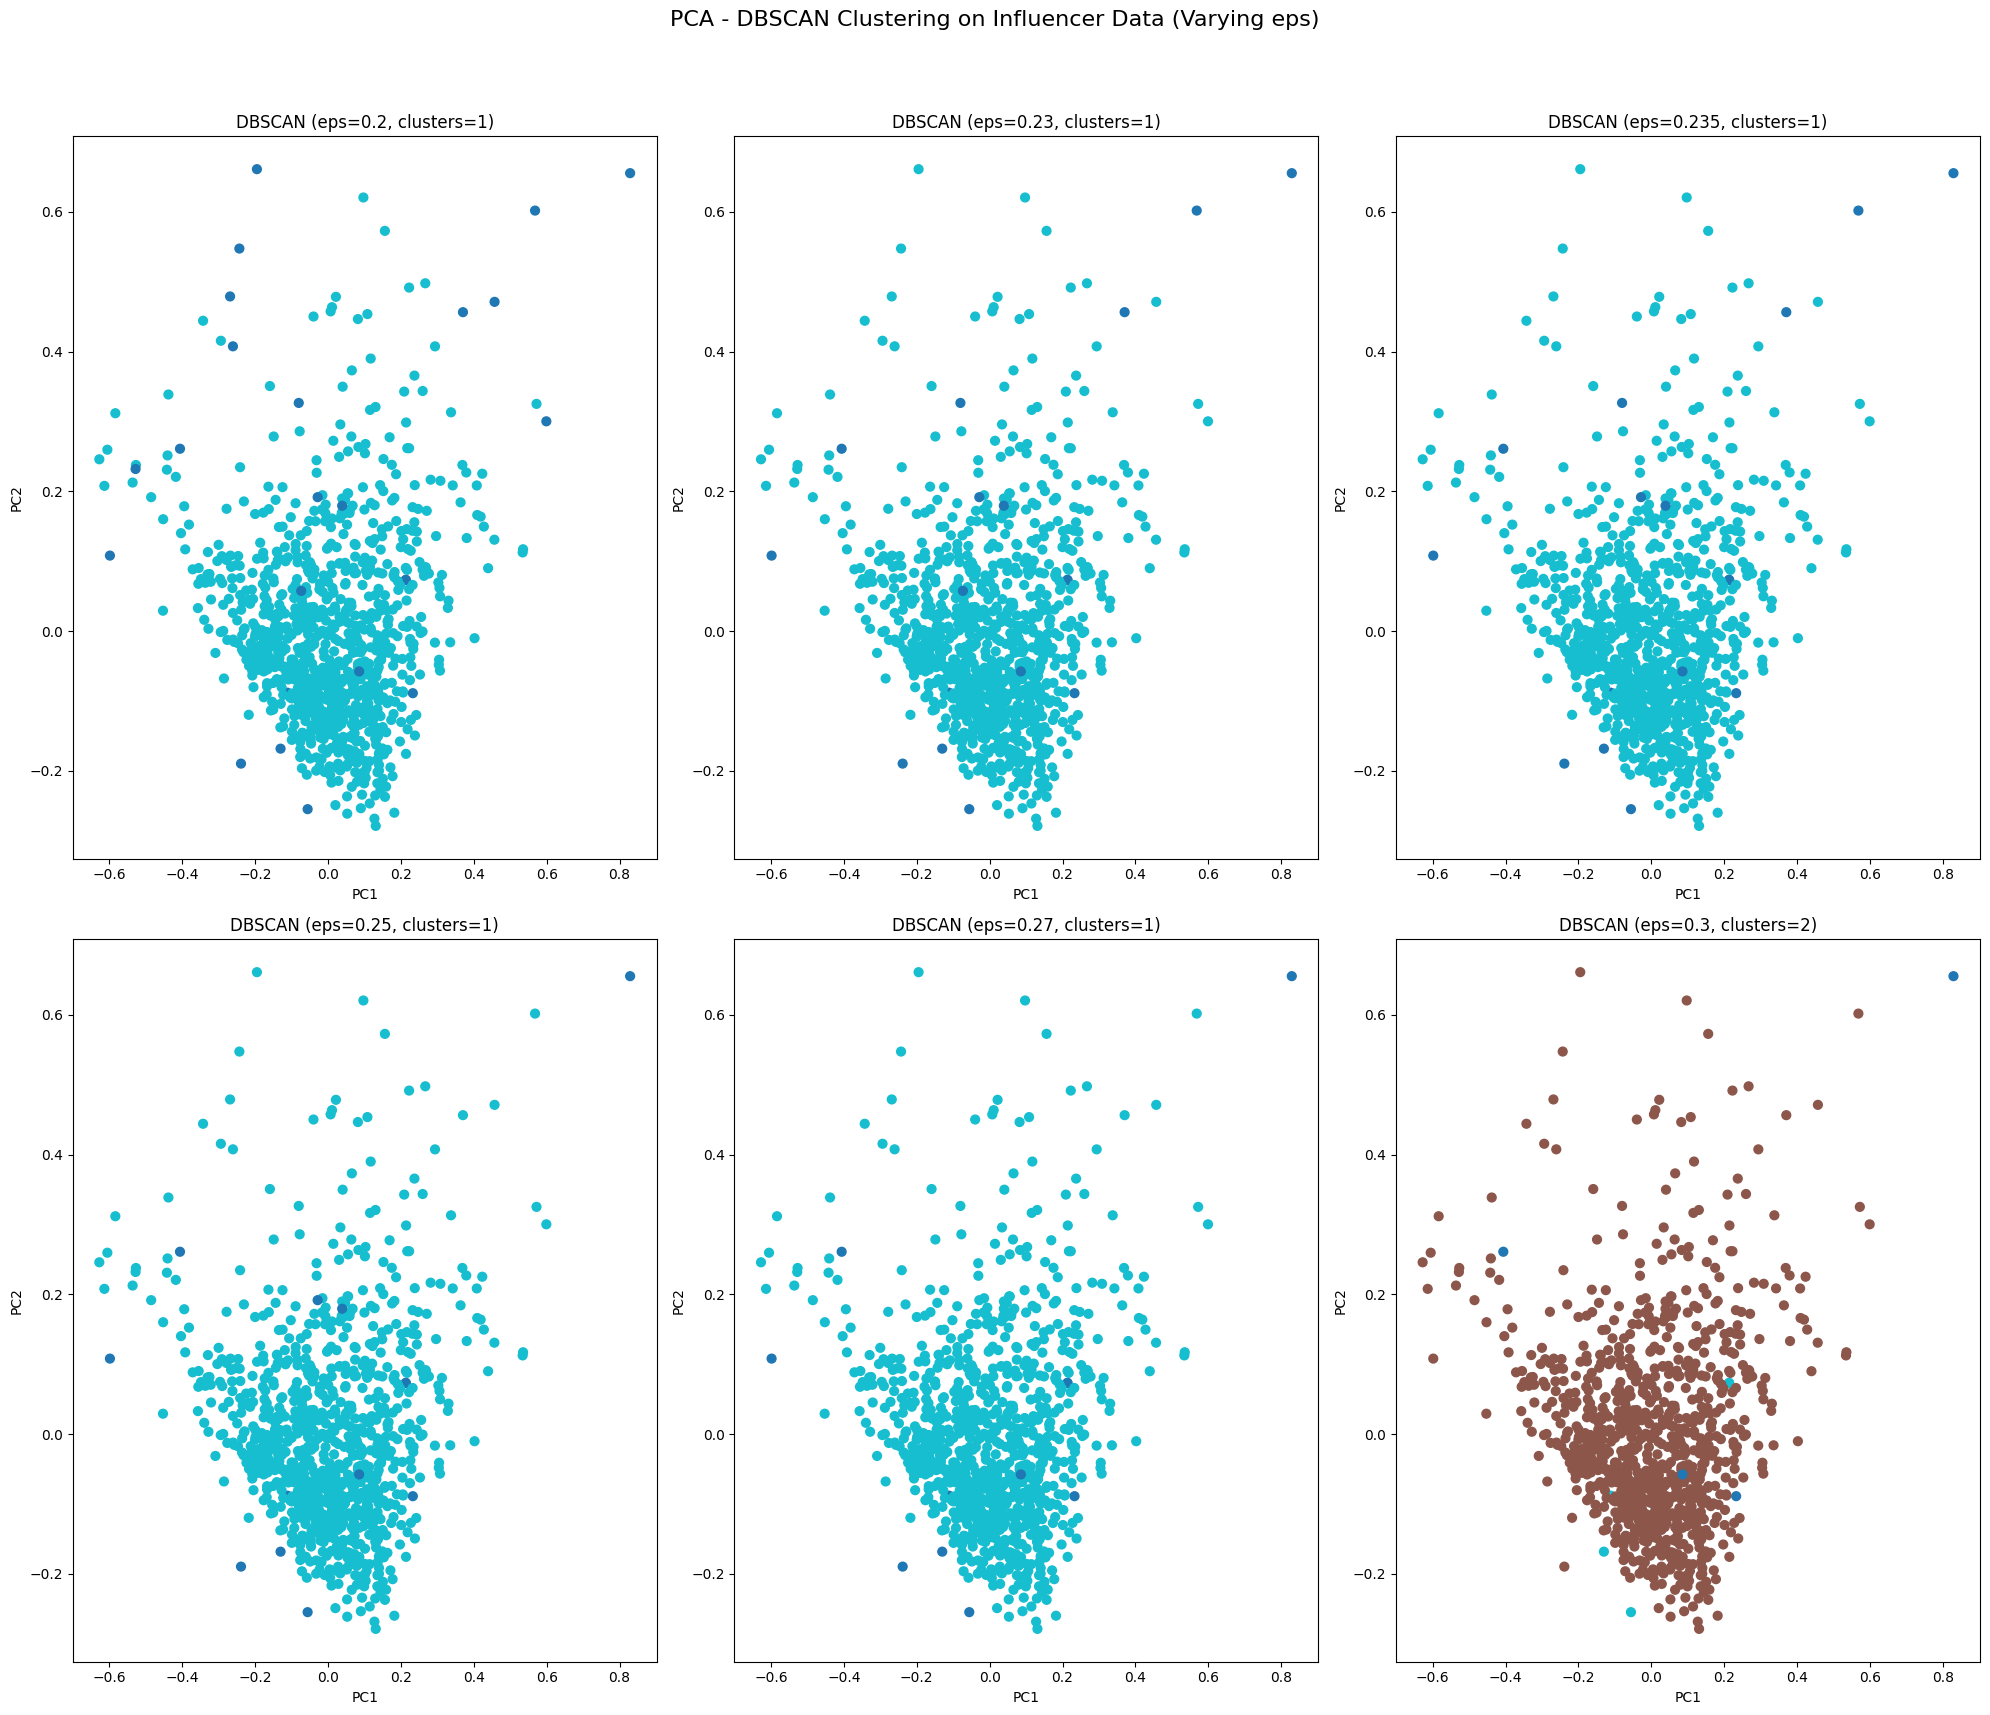

In [27]:
eps_values = [0.20, 0.23, 0.235, 0.25, 0.27, 0.30]
summary = []
fig, axes = plt.subplots(2, 3, figsize=(20, 18))
fig.suptitle('PCA - DBSCAN Clustering on Influencer Data (Varying eps)', fontsize=16)
for ax, eps in zip(axes.flatten(), eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=6)
    labels = dbscan.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    try:
        score = silhouette_score(X, labels) if n_clusters > 1 else 'N/A'
    except:
        score = 'Error'
    summary.append({
        'eps': eps,
        'clusters': n_clusters,
        'noise_points': n_noise,
        'silhouette_score': score
    })
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=40)
    ax.set_title(f'DBSCAN (eps={eps}, clusters={n_clusters})')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [28]:
summary_df = pd.DataFrame(summary)
display(summary_df)

,eps,clusters,noise_points,silhouette_score
0,0.200,1,25,N/A
1,0.230,1,18,N/A
2,0.235,1,17,N/A
3,0.250,1,14,N/A
4,0.270,1,12,N/A
5,0.300,2,4,0.572631


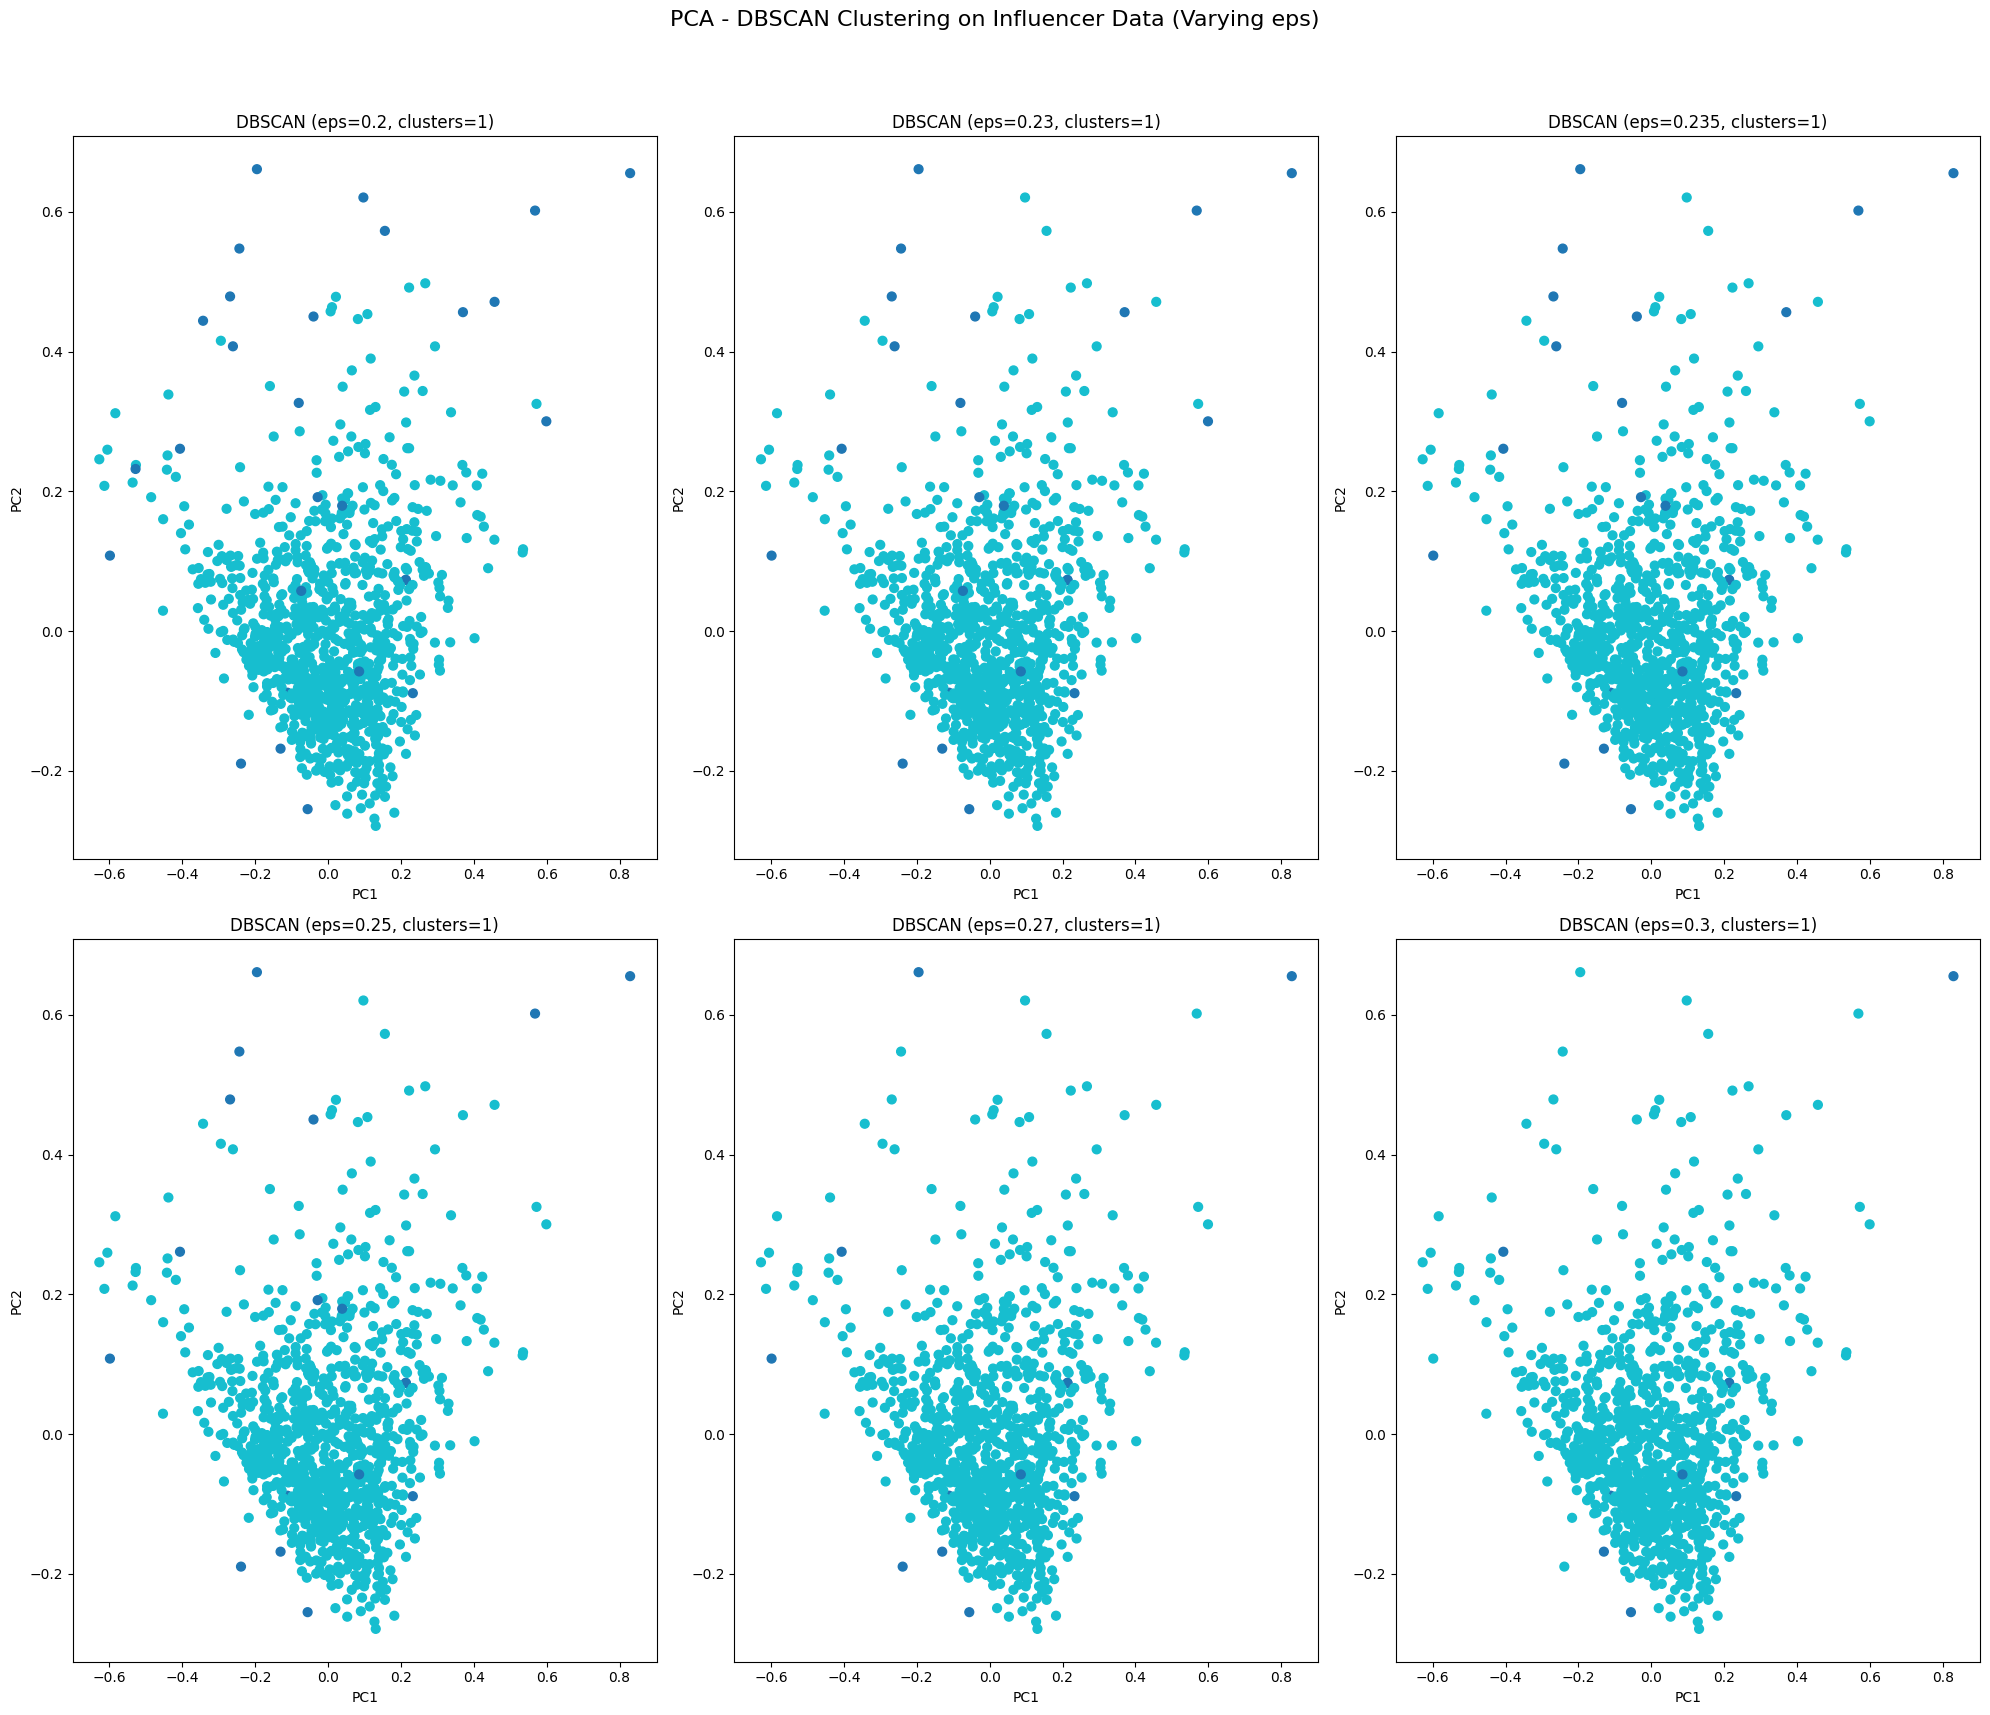

In [29]:
eps_values = [0.20, 0.23, 0.235, 0.25, 0.27, 0.30]
summary = []
fig, axes = plt.subplots(2, 3, figsize=(20, 18))
fig.suptitle('PCA - DBSCAN Clustering on Influencer Data (Varying eps)', fontsize=16)
for ax, eps in zip(axes.flatten(), eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    try:
        score = silhouette_score(X, labels) if n_clusters > 1 else 'N/A'
    except:
        score = 'Error'
    summary.append({
        'eps': eps,
        'clusters': n_clusters,
        'noise_points': n_noise,
        'silhouette_score': score
    })
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=40)
    ax.set_title(f'DBSCAN (eps={eps}, clusters={n_clusters})')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [30]:
summary_df = pd.DataFrame(summary)
display(summary_df)

,eps,clusters,noise_points,silhouette_score
0,0.200,1,29,N/A
1,0.230,1,24,N/A
2,0.235,1,22,N/A
3,0.250,1,19,N/A
4,0.270,1,13,N/A
5,0.300,1,10,N/A


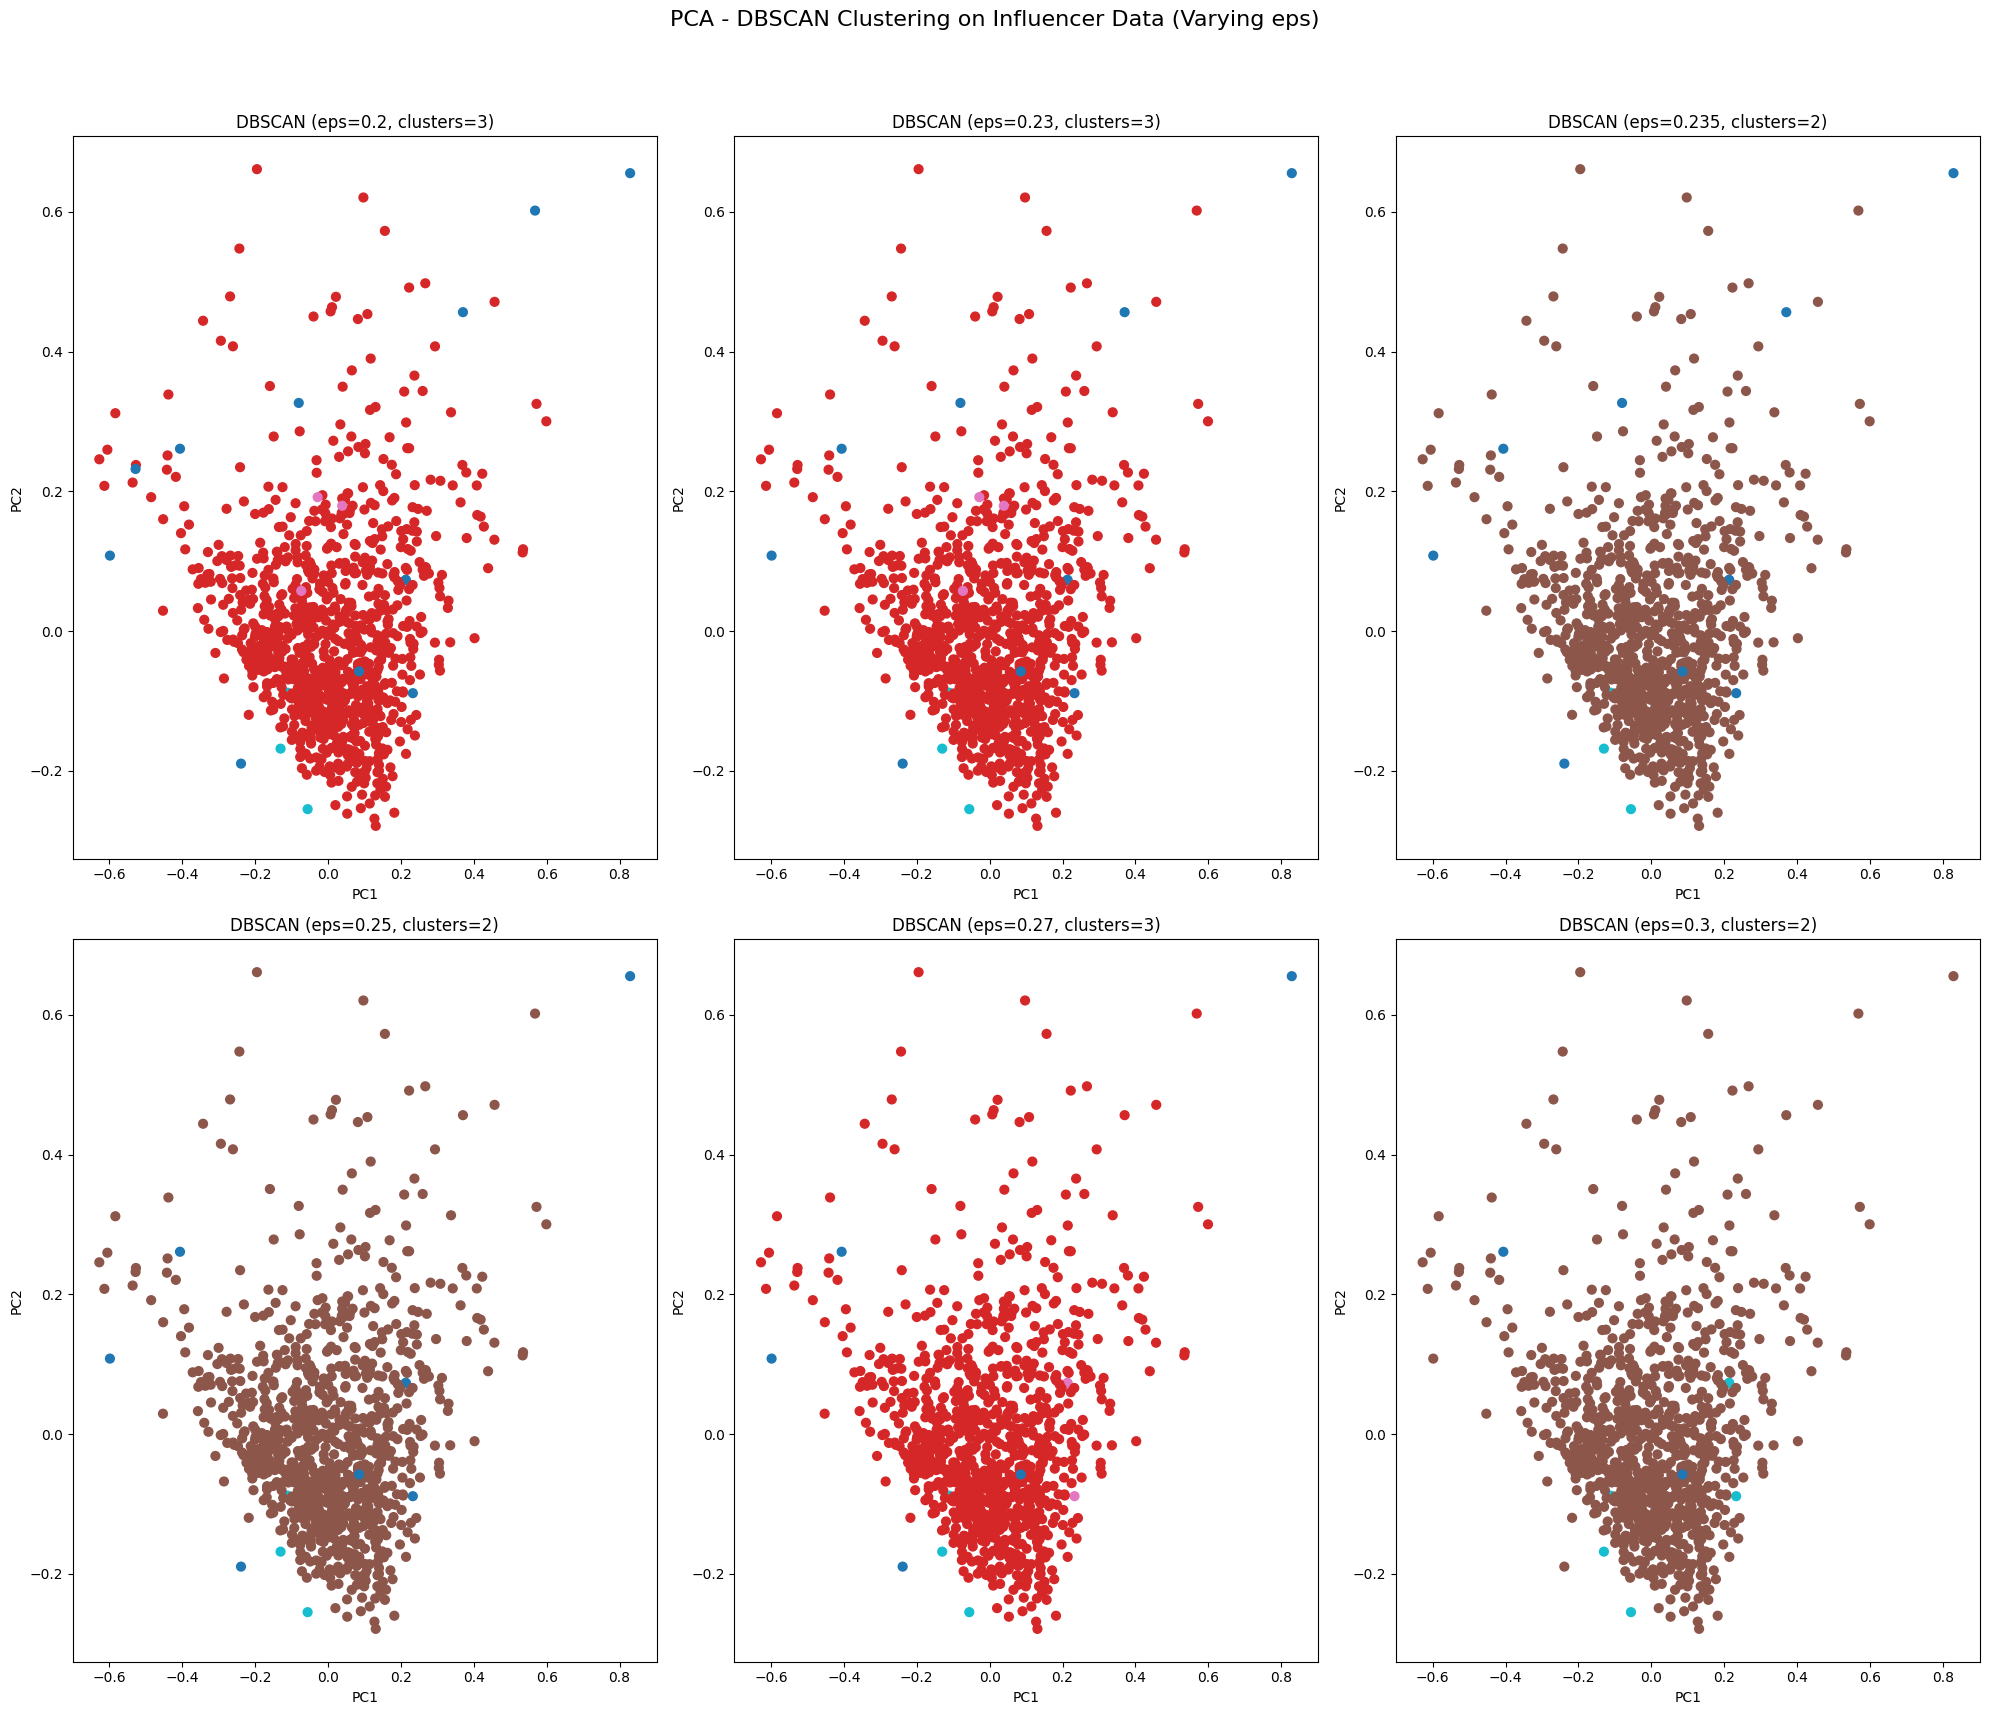

In [31]:
eps_values = [0.20, 0.23, 0.235, 0.25, 0.27, 0.30]
summary = []
fig, axes = plt.subplots(2, 3, figsize=(20, 18))
fig.suptitle('PCA - DBSCAN Clustering on Influencer Data (Varying eps)', fontsize=16)
for ax, eps in zip(axes.flatten(), eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    try:
        score = silhouette_score(X, labels) if n_clusters > 1 else 'N/A'
    except:
        score = 'Error'
    summary.append({
        'eps': eps,
        'clusters': n_clusters,
        'noise_points': n_noise,
        'silhouette_score': score
    })
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=40)
    ax.set_title(f'DBSCAN (eps={eps}, clusters={n_clusters})')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [32]:
summary_df = pd.DataFrame(summary)
display(summary_df)

,eps,clusters,noise_points,silhouette_score
0,0.200,3,12,0.430351
1,0.230,3,10,0.429251
2,0.235,2,10,0.546826
3,0.250,2,8,0.551968
4,0.270,3,5,0.550916
5,0.300,2,2,0.577275
